In [1]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

# Import required libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [2]:
# Data Import
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data dimension
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


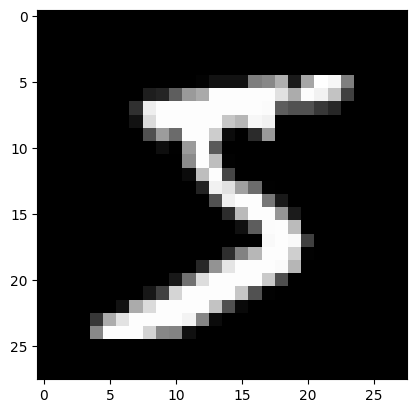

Image represents number 5


In [3]:
# Printing the first image
plt.imshow(x_train[0], cmap='gray')
plt.show()
print('Image represents number',y_train[0])

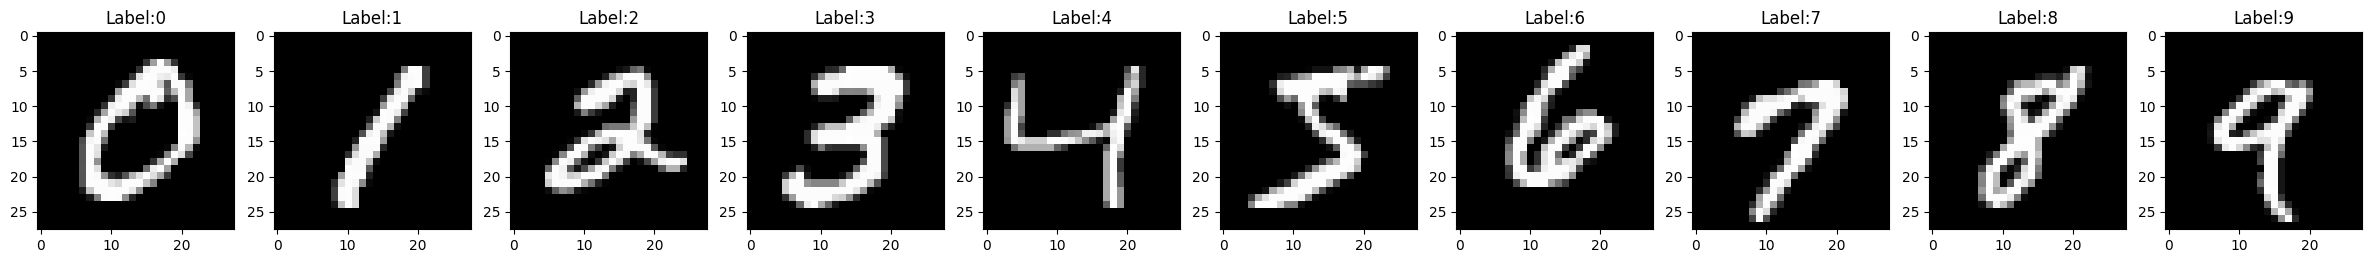

In [4]:
# Images of each class
num_class = 10

# creating a subplot
fig, ax = plt.subplots(1, num_class, figsize=(30, 30))

# loop to get unique values
for i in range(num_class):
    extract = x_train[y_train == i][0]
    ax[i].imshow(extract, cmap='gray')
    ax[i].set_title(f'Label:{i}')

In [5]:
# target encoding
y_train = utils.to_categorical(y_train, num_class)
y_test = utils.to_categorical(y_test, num_class)

In [6]:
# Data sample after encoding
for i in range(5):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
# Data preprocessing

# Data Scaling
x_train = x_train/255.0
x_test = x_test/255.0

# Data reshaping for ann
ann_x_train = x_train.reshape(x_train.shape[0], -1)
ann_x_test = x_test.reshape(x_test.shape[0], -1)

In [8]:
# Shape of the data after reshaping
print(ann_x_train.shape)
print(ann_x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
# ANN Model Architecture
ann_model = Sequential([
            Dense(units = 128, activation='relu', input_shape=(784, )),
            Dense(units = 128, activation='relu'),
            Dropout(0.25),
            Dense(units = 128, activation='relu'),
            Dense(units = 10, activation='softmax')
            ])

# Model compilation
ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Fitting data into model and logging the processing time

# start time
start_time = time.time()

# model fitting
ann_model.fit(ann_x_train, y_train, validation_split=0.2, batch_size=256, epochs=10)

# end_time
end_time = time.time()

# Processing time
processing_time = end_time - start_time
duration = time.strftime('%M:%S', time.gmtime(processing_time))
print("Training Time:", duration)

Epoch 1/10
188/188 [==============================] - 23s 89ms/step - loss: 0.4934 - accuracy: 0.8543 - val_loss: 0.1858 - val_accuracy: 0.9467
Epoch 2/10
188/188 [==============================] - 9s 47ms/step - loss: 0.1791 - accuracy: 0.9457 - val_loss: 0.1336 - val_accuracy: 0.9610
Epoch 3/10
188/188 [==============================] - 8s 45ms/step - loss: 0.1279 - accuracy: 0.9620 - val_loss: 0.1062 - val_accuracy: 0.9683
Epoch 4/10
188/188 [==============================] - 8s 45ms/step - loss: 0.0996 - accuracy: 0.9706 - val_loss: 0.0968 - val_accuracy: 0.9711
Epoch 5/10
188/188 [==============================] - 9s 47ms/step - loss: 0.0777 - accuracy: 0.9764 - val_loss: 0.0898 - val_accuracy: 0.9727
Epoch 6/10
188/188 [==============================] - 9s 47ms/step - loss: 0.0636 - accuracy: 0.9804 - val_loss: 0.0935 - val_accuracy: 0.9732
Epoch 7/10
188/188 [==============================] - 8s 43ms/step - loss: 0.0538 - accuracy: 0.9829 - val_loss: 0.0900 - val_accuracy: 0.973

In [11]:
# Model evaluation
ann_model.evaluate(ann_x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.0776 - accuracy: 0.9772


[0.07760729640722275, 0.9771999716758728]

In [12]:
# Predictions
y_pred = ann_model.predict(ann_x_test)
y_pred_class = np.argmax(y_pred, axis=1)

313/313 [==============================] - 2s 5ms/step


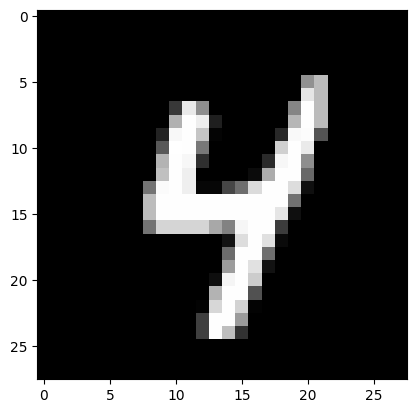

The actual number is 4
The predicted number is 4


In [13]:
# Checking a random image for prediction
rdm_val = np.random.choice(len(ann_x_test))
sample = ann_x_test[rdm_val]

# true label
y_true = np.argmax(y_test, axis=1)

# Plot the image and the label
plt.imshow(sample.reshape(28, 28), cmap='gray')
plt.show()

# Printing actual and predicted
print(f'The actual number is {y_true[rdm_val]}')
print(f'The predicted number is {y_pred_class[rdm_val]}')

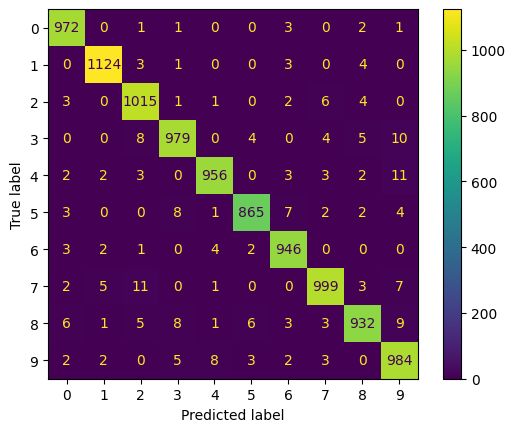

In [14]:
# Confusion matrix for ANN model
cm = ConfusionMatrixDisplay.from_predictions(y_true, y_pred_class)

In [15]:
# Reshape for CNN model
cnn_x_train = x_train.reshape(len(x_train), 28, 28, 1)
cnn_x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [16]:
# CNN Model Architecture
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
    ])

# CNN Model compilation
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                589888    
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                      

In [17]:
# Fitting data into model and logging the processing time

# start time
start_time = time.time()

# model fitting
cnn_model.fit(cnn_x_train, y_train, validation_split=0.2, batch_size=256, epochs=10)

# end_time
end_time = time.time()

# Processing time
processing_time = end_time - start_time
duration = time.strftime('%M:%S', time.gmtime(processing_time))
print("Training Time:", duration)

Epoch 1/10
188/188 [==============================] - 11s 51ms/step - loss: 0.2789 - accuracy: 0.9189 - val_loss: 0.0814 - val_accuracy: 0.9768
Epoch 2/10
188/188 [==============================] - 8s 45ms/step - loss: 0.0634 - accuracy: 0.9810 - val_loss: 0.0568 - val_accuracy: 0.9827
Epoch 3/10
188/188 [==============================] - 9s 47ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0457 - val_accuracy: 0.9858
Epoch 4/10
188/188 [==============================] - 9s 48ms/step - loss: 0.0310 - accuracy: 0.9899 - val_loss: 0.0442 - val_accuracy: 0.9868
Epoch 5/10
188/188 [==============================] - 9s 48ms/step - loss: 0.0230 - accuracy: 0.9929 - val_loss: 0.0489 - val_accuracy: 0.9861
Epoch 6/10
188/188 [==============================] - 8s 45ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0421 - val_accuracy: 0.9887
Epoch 7/10
188/188 [==============================] - 9s 47ms/step - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.0551 - val_accuracy: 0.984

In [18]:
# Model evaluation
cnn_model.evaluate(cnn_x_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.0399 - accuracy: 0.9883


[0.0398511067032814, 0.9883000254631042]

In [19]:
# Predictions
cnn_y_pred = cnn_model.predict(cnn_x_test)
cnn_y_pred_class = np.argmax(cnn_y_pred, axis=1)

313/313 [==============================] - 2s 5ms/step


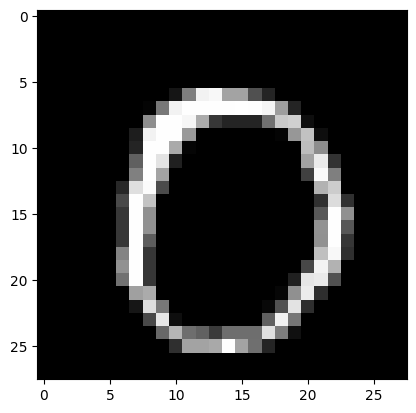

The actual number is 0
The predicted number is 0


In [20]:
# Checking a random image for prediction
rdm_val = np.random.choice(len(cnn_x_test))
sample = cnn_x_test[rdm_val]

# true label
cnn_y_true = np.argmax(y_test, axis=1)

# Plot the image and the label
plt.imshow(sample.reshape(28, 28), cmap='gray')
plt.show()

# Printing actual and predicted
print(f'The actual number is {cnn_y_true[rdm_val]}')
print(f'The predicted number is {cnn_y_pred_class[rdm_val]}')

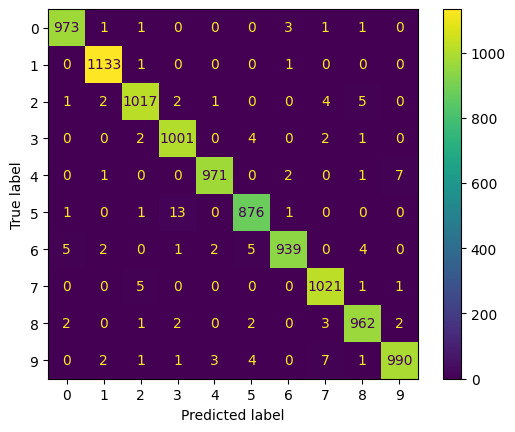

In [21]:
# Confusion matrix for ANN model
cm = ConfusionMatrixDisplay.from_predictions(cnn_y_true, cnn_y_pred_class)